# Logistic Regression

The result of a certain action is yes or no or in such terms.
Instead of trying to predict an exact outcome, we will predict the probability of an outcome.

Example: The certainity of a customer buying a product.

The formula for Logistic Regression:

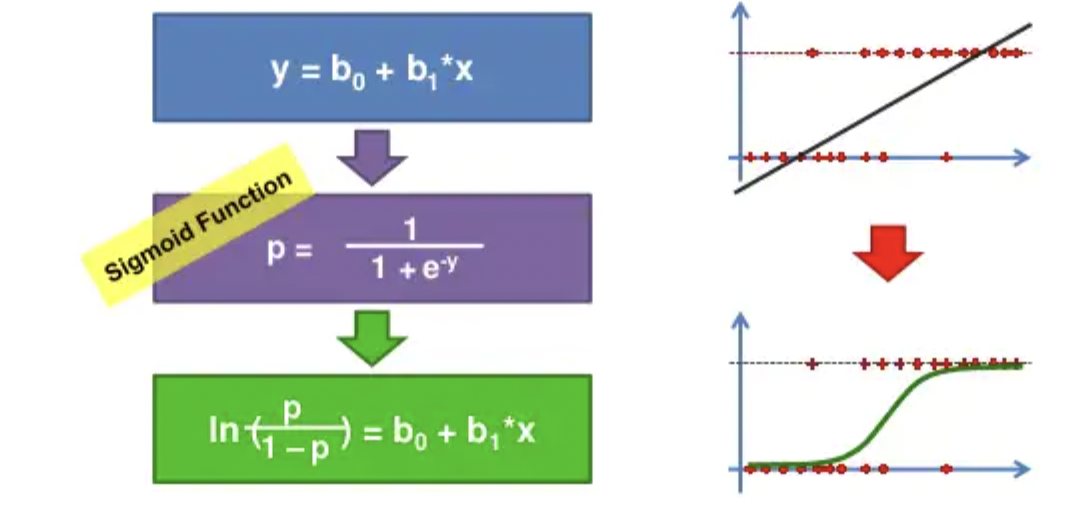

Using the **ln(p/1-p)** formula we come up with the curve line, it is the same as the trend line for linear regression, this is basically the best fitting line like how we do for linear regression. 

We can use this to predict probability.

Let's take random x values of 20,30,40 and 50. Now using the curvy trend line we need to project the points to get the value of Y which is basically the probability.

We use a mid point, and if the probability value lies under the mid point line, we assume a Ycap value of 0, and if we get the probability value of more than mid point, we take the Ycap value of 1.

(Refer the PPT for graphs)


In [1]:
#Dataset for buying SUV based on Salary and Age 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size =0.2,random_state=0)

### Feature Scaling

We are applying FS, so the performance of our model will increase.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
#Tuning model can be done later
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [11]:
# print(model.predict([[30,87000]])) 
# the above line gives output as 1 because it has not been scaled
# transforming the input in the right scale
print(model.predict(sc.transform([[30,87000]])))

[0]


Printing the predicted output alongside the actual output.

In [15]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [16]:
#The confusion matrix will show us a matrix of our model's accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  6],
       [ 3, 19]])

Confusion matrix is as shown below:

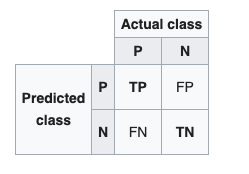

We have indeed 65 correct predictions of the class zero,
meaning the customers of the test who didn't buy the new SUV then.

19 correct predictions of the class one meaning correct predictions of the customers who bought the SUV.

And then 6 incorrect predictions of the class one meaning three incorrect predictions of the customers who but in reality the SUV but were predicted not to.

And finally, 3 incorrect predictions of the Class Zero, meaning eight customers who in reality didn't buy the SUV but were predicted to buy it.

In [17]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875